# Laboratory 2

In [50]:
library(tidyverse)
set.seed(1234)

## Exercise 1

In [51]:
x <- c(15.58,15.9,16,16.1,16.2)
p1 <- c(0.15,0.21,0.35,0.15,0.14)
p2 <- c(0.14,0.05,0.64,0.08,0.09)
probs <- tibble(x,p1,p2)

### Evaluate the expected values, E[X], and the variance, V ar(X), for both methods

In [52]:
avg1 <- mean(probs$x*probs$p1)
var1 <- mean(probs$x**2*probs$p1)-avg**2

message('The average of the data for the first method measurements is ', avg1, ' whereas the variance is ', var1)

avg2 <- mean(probs$x*probs$p2)
var2 <- mean(probs$x**2*probs$p2)-avg**2

message('The average of the data for the second method measurements is ', avg2, ' whereas the variance is ', var2)

The average of the data for the first method measurements is 3.1918 whereas the variance is 40.75714476

The average of the data for the second method measurements is 3.19244 whereas the variance is 40.77641196



## Exercise 2

The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30.

$$
\begin{align}
\text{pdf}(t) &= \frac{e^{-t/\tau}}{\tau}\\\\
\end{align}
$$

### Simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

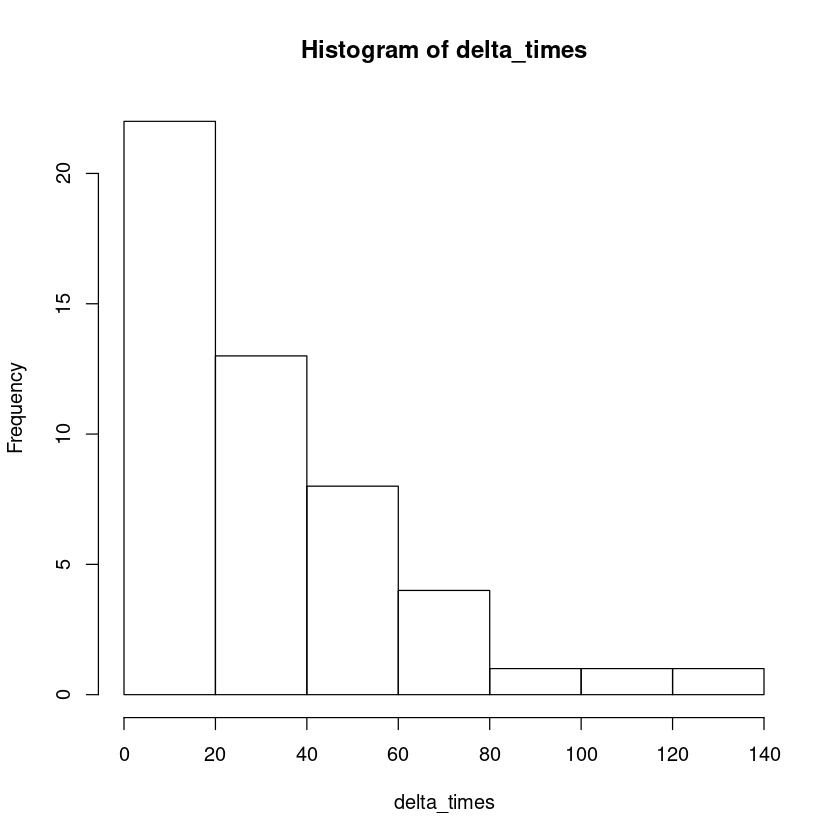

In [53]:
# We sample 50 times from an exponential distribution with rate 1/30
rate <- 1/30
delta_times <- rexp(50,rate) # These are the times that each patient had to wait since the patient immediately before them.
hist(delta_times)

### What is the probability that a person will wait for less than 10 minutes?

In [54]:
# This is the cumulative probability evaluated at 10.
p_lt_10 <- pexp(10,rate)
message('The probability that a person will wait for less than 10 minutes is ', round(p_lt_10,4)) #*! inconsistent for _total_ wait times

The probability that a person will wait for less than 10 minutes is 0.2835



### Evaluate the average waiting time from the simulated data and compare it with the expected value

In [55]:
# The theoretical expected value is 1/rate:
avg_theo <- 1/rate
avg_emp <- mean(delta_times)
message('The theoretical expected value is ', avg_theo, ', whereas the empirical average is ', avg_emp,'.')

The theoretical expected value is 30, whereas the empirical average is 29.6752301211249.



### What is the probability for waiting more than one hour before being received?

In [56]:
# This is given as the probability of being received eventually (that is, 1),
# minus the probability of waiting less than 60 minutes.
p_gt_60 <- 1 - pexp(60,rate)
message('The probability that a person will wait for more than an hour is ', round(p_gt_60,4))

The probability that a person will wait for more than an hour is 0.1353



## Exercise 3
On a book, on average, there is one typo error every three pages.
If the number of errors follows a Poisson distribution, plot the pdf and cdf, and
calculate the probability that there is at least one error on a specific page of the
book.

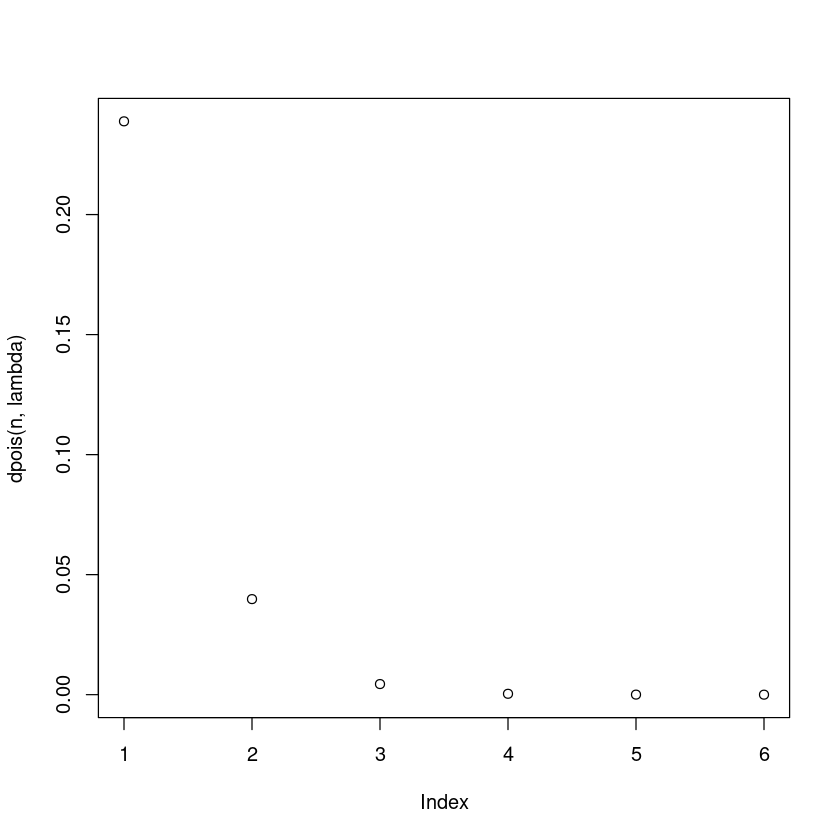

The probability of at least one error in a given page is 0.2835.



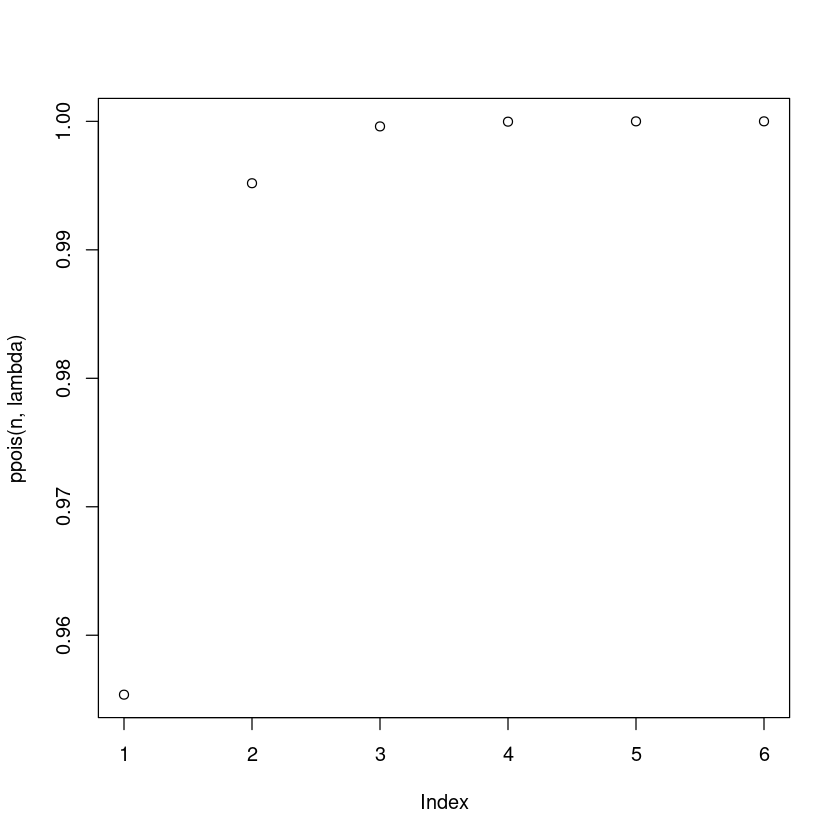

In [77]:
lambda <- 1/3 # There's on average one error every three pages
n <- 1:6 # How many erros?
plot(dpois(n,lambda))
plot(ppois(n,lambda))
# The probability of there being at least one error in a given page,
# is the complementary probability of there being no errors, that is:
p_lt_1 <- 1-dpois(0,lambda)
message('The probability of at least one error in a given page is ', round(p_lt_1,4),'.')

## Exercise 4
We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed

In [81]:
# We assume that in the 52 cards there are 4 aces.
# That is, the probability of success is 4/52 = 1/13.
# The number of events required to obtain an ace follows a geometric distribution.
##
# The probability that at least 10 draws are needed 
# is the complement to the probability that the card is found within the first 9 attempts:
prob <- 1/13 
p_gt_10 <- 1 - pgeom(9,prob)
message('The probability of requiring at least ten draws is ', round(p_gt_10,4),'.')

The probability of requiring at least ten draws is 0.4491.



## Exercise 5
The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form
$$
\begin{align}
f(t) &= \left\{
\begin{array}
c(t − 1)(2 − t), & 1 < t < 2\\
0, & \text{otherwise}\\
\end{array}
\right.
\end{align}
$$
where $t$ is the time in hours.

### Using the integrate() R function, determine the constant c (and verify it analytically)

In [124]:
# The analytical value for the integral is 6, therefore, the normalization constant is 1/6 = 0.16666...
c_an <- 1/6

ff <- function(t){
    if(1<t & t<2){
        return((t-1)*(2-t))
    }
    return(0)
}
g <- Vectorize(ff, vectorize.args = "t")
c_num <- 1/integrate(g,lower = 0, upper = 2)$value

### Write the set of four R functions and plot the pdf and cdf, respectively

In [127]:
dff <- function(t){c_num*g(t)}
pff <- function(t){integrate(dff,1,t)$value}
## TODO

### Evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take between 90 and 120 minutes.

In [135]:
p_gt_75 <- 1 - pff(1.25)
p_bt_90_120 <- pff(2) - pff(1.5)

message('The probability that a student will take longer than 75 minutes is ',p_gt_75,'.')
message('The probability that a student will take between 90 and 120 minutes is ',p_bt_90_120,'.')

The probability that a student will take longer than 75 minutes is 0.84375.

The probability that a student will take between 90 and 120 minutes is 0.5.



## Exercise 6
The lifetime of tires sold by an used tires shop is $10^4x$ km, where $x$ is a random variable the distribution funcion below
$$
\begin{align}
f(x) &= \left\{
\begin{array}\\
\frac{2}{x^2}, & 1 < x < 2\\
0, & \text{otherwise}\\
\end{array}
\right.
\end{align}
$$

## Write the set of four R functions and plot the pdf and cdf, respectively

In [143]:
ff <- function(x){
    if(1<x & x<2){
        return(2/x**2)
    }
    return(0)
}

g <- Vectorize(ff, vectorize.args = "x")
c_num <- 1/integrate(g,lower = 0, upper = 2)$value

dff <- function(x){c_num*g(x)}
pff <- function(x){integrate(dff,0,x)$value}

### Determine the probability that tires will last less than 15000 km

In [145]:
p_lt_15000 <- pff(1.5)
message('The probability that the tires will last less than 15000km is ', round(p_lt_15000,4),'.')

The probability that the tires will last less than 15000km is 0.6667.



### Sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $\text{Var}(X) = \text{E}[X^2] − \text{E}[X]^2$